# Analysis

get the locally saved data

In [2]:
import pickle
import pandas as pd
import os
import sys
import seaborn as sn
import matplotlib.pyplot as plt
import yaml

sys.path.append('/home/joel/projects/driftlon/analysis')
sys.path.append('/home/joel/projects/driftlon')
from correlation import *
from analysis_utils import *

In [3]:
X = pickle.load(open('../X.pkl', 'rb+'))
Y = pickle.load(open('../Y.pkl', 'rb+'))

In [4]:
len(X), len(Y)

(87303, 87303)

filter for the numeric fields

In [5]:
non_numerical_fields_path = './non_numeric_fields.yaml'

with open(non_numerical_fields_path, 'r') as file_:
    non_numerical_fields = yaml.load(file_.read(),  Loader=yaml.BaseLoader)

In [6]:
all_keys = get_all_keys(X)
common_keys = [x for x in get_common_keys(X) if x not in non_numerical_fields]
data_for_keys = get_data_for_keys(common_keys, X)

In [7]:
all_data = pd.DataFrame(data_for_keys).T.set_axis(common_keys, axis=1)
quant_indices = [common_keys[x[0]] for x in enumerate(all_data.loc[0,:]) if type(x[1])==int] 
data = pd.DataFrame(all_data.loc[:,quant_indices])
converted_data = data.apply(pd.to_numeric)

In [ ]:
converted_data.describe()

### create correlation matrix

In [ ]:
corr_matrix = converted_data.corr()

In [ ]:
plt.figure(figsize=(30,30))
sn.heatmap(corr_matrix, annot=True, cmap="PiYG", center=0)
plt.savefig('plots/heatmap.png')

In [ ]:
corr_matrix.unstack().dropna().drop_duplicates().sort_values(ascending=False).to_csv('correlations.csv')

### create violin-plots for all numeric fields

In [ ]:
N = len(X)

for i in range(len(common_keys)):
    plt.clf();
    column = converted_data.loc[:,common_keys[i]].sample(n=N, ignore_index=True);
    plt.violinplot(column);
    plt.ylabel(common_keys[i]);
    plt.savefig('plots/violin/' + common_keys[i] + '.png');

### create scatter matrix

In [ ]:
converted_data_with_target = converted_data.copy(deep=True)
converted_data_with_target['target'] = [int(y_ > 0) for y_ in Y]

In [ ]:
# plt.figure(figsize=(30,30))
plt.clf();
sn.pairplot(converted_data_with_target.sample(n=100, ignore_index=True))
plt.savefig('plots/pairplot.png')

### PCA

In [8]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=0.99)
data_reduced = pca.fit_transform(converted_data)

visualize principal components

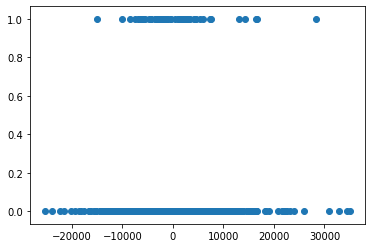

In [50]:
sample_size = 1000
y = [int(y_ > 0) for y_ in Y]

for i in range(int(pca.n_components_)):
    plt.clf()
#     column = data_reduced[:,i].sample(n=sample_size, ignore_index=True)
    data_with_target = list(zip(data_reduced[:,i], y))
    choices = random.choices(data_with_target, k=1000)
    column, target = list(zip(*choices))
    plt.scatter(column, target)
    plt.savefig(f'plots/pca/pca_{i}.png')